Goal: Learn how to manipulate 2D signals (=images) in both spectral and spatial domain.

**Due date**: 

Assignment due date is for Monday November 2nd, at 11h55 PM. A 3 points penalty per day will be applied in case of delay.

**Submission files** :

All code must be contained in the present template, as well as the answers to the questions (either commented within the code or with special Markdown/text cells).
Please follow the order of the subject.
Commenting the code is important and the overall clarity of the work will be taken in account. Make sure that every variable is clearly understandable and every figure readable.

You will also have to submit a static **HTML** version of this notebook *File->Download as...->HTML*. Put all your files (ipynb, html, eventually others externals ones) in a single **.zip** archive, named after your student number (StudentNb1_StudentNb2.zip).


# First session: Spatial filtering

**Note:** In your algorithms, take a special attention to the datatype of your arrays (*np.uint8*, *np.float32*, etc.). For image processing, it is probably going to be convenient to cast your arrays into  *np.float32*, then cast them back to *np.uint8* to display them.

**Note 2:** We highly recommand to use the *imshow* feature in the following way:
    
```python
    plt.imshow(mon_img, vmin=0, vmax=255)
    # ou bien
    ax.imshow(mon_img, vmin=0, vmax=255)
```
This forces matplotlib to interpretate values below or equal to 0 as black and values above or equal to 255 as white ([0, 255] being the possible value range in uint8). If you want to display images which values are between [0,1], you'll have to change *vmin* and *vmax* accordingly.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray' # Changing the default colormap, do not modify this.
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0) # Default figure size, you can modify this if you need to.
from scipy.signal import medfilt2d

## Exercice 1 - Image Quality Enhancement
The goal of this exercise is to correct a heavily corrupted image. In order to do so, you will have to code a few of the filters you've seen in class.

### Question 1 (1.5 points)
Load the image *TempsModernes.jpeg* by using the function:
```python
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
```
(a) Display the image. As you can notice, it is very dark and has a very low contrast. Next to the image, plot the histogram of the image. You can use the code given in the next cell to do so. 

(b) We will fix the image's exposure and contrast by coding histogram equalization as seen in class.
Complete the following code:
```python
def equalize_histogram(img):
    imegale = np.zeros(img.shape)
    hist, bins = np.histogram(img, 256,[0,256])
    hist = hist.astype(np.float32)
    ...
```
Display the equalized image as well as its histogram. What do you observe?

In [2]:
def plot_histogram(img, ax=None, title_txt = None):
    """
    param img: image as a np.ndarray, which values are between [0,255]
    param ax: (optional) matplotlib axe on which the histogram will be plotted. 
    If not provided, a new axe will be created.
    """
    hist, bins = np.histogram(img, 256,[0,256])
    if ax is not None:
        ax.bar(bins[:-1], hist)
        ax.set_title(title_txt)
    else:
        plt.bar(bins[:-1], hist)
        plt.title(title_txt)
    plt.show()
    return
        
def equalize_histogram(img):
    """
    param img: image as np.uint8 
    """
    hist, bins = np.histogram(img, 256,[0,256])
    hist = hist.astype(np.float32)
    T = hist.cumsum()# cumolative sum to get the T(i)
    T_normalized= 255* (T - T.min())/(T.max()-T.min())# Normalization
    eq_img=T_normalized[img]
    return eq_img.astype(np.uint8)

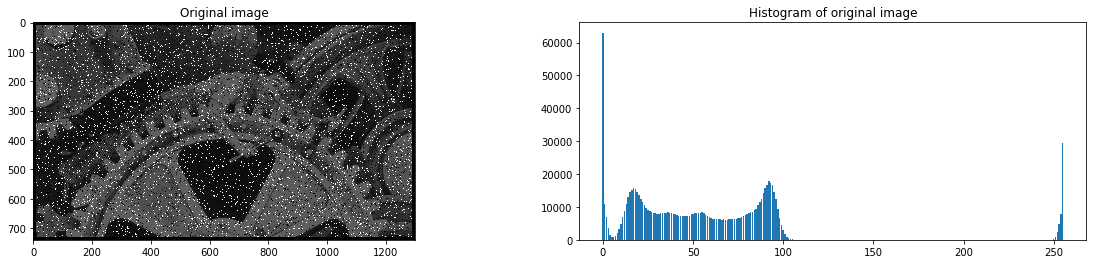

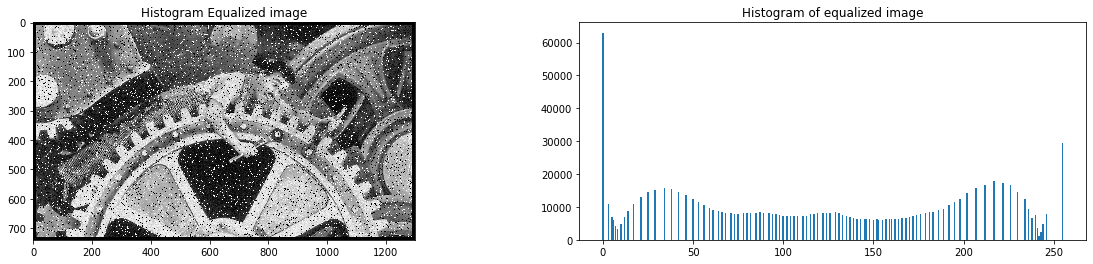

In [3]:
img1 = cv2.imread('TempsModernes.jpeg', cv2.IMREAD_GRAYSCALE)

## Plot original image and histogram
fig1, (ax, ax1) = plt.subplots(1,2, figsize=(20,4))
ax.imshow(img1, vmin=0, vmax=255)
ax.set_title("Original image")
plot_histogram(img1,ax1, "Histogram of original image") # get and plot histogram


## Plot histogram equalized image and histogram
img2 = equalize_histogram (img1)
fig2, (ax, ax1) = plt.subplots(1,2, figsize=(20,4))
ax.imshow(img2, vmin=0, vmax=255)
ax.set_title("Histogram Equalized image")
plot_histogram(img2,ax1, "Histogram of equalized image")

<font color='blue'>
The histogram profile is flattened and the intensitiy distribution of the image is modified. 
    
The contrast of the image is adjusted and as a result, the image is enhanced. 

### Question 2 (1 point)
After the equalization process, what noise type seems predominant in the image? Explain why a median filter is well suited to remove it. Try it by filtering the image with a filter size of 5.


<font color='blue'>
The noise is salt and pepper. Median filter is a non-linear filter that replaces the noise intensities with the median values of its neighborhood and so it preserves the image sharpnesses. The filter is powerful in denoising of the image with the salt & pepper noise. 

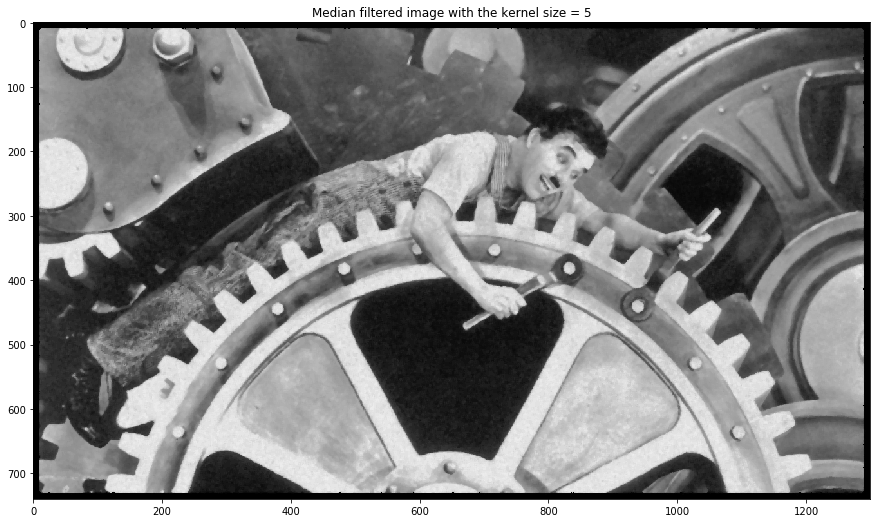

In [4]:
kernel_size = 5
image_med = medfilt2d(img2, kernel_size)# median filtering

## Plot
plt.imshow(image_med, vmin=0, vmax=255);
plt.title("Median filtered image with the kernel size = {}".format(kernel_size));

### Question 3 (1,5 points)
For the next step, you will have to use filtering by 2D convolution. Implement the function *conv2d* which takes an image and a mask as parameters and outputs the 2D convolution of both. You are only allowed to use matrix operators and maximum 2 *for* loops. You are not allowed to use any kind of already existing convolution function. But in order to maintain the same image size between the input and the output, you will have to do some **0-padding**. For that, you can take inspiration from the following code (to be completed). You can safely assume that the convolution mask is always going to be squared and its size odd.
```python
def conv2d(img, mask):
    out = np.zeros(img.shape, dtype=np.float32)
    size_mask = mask.shape[0]
    pad_values = ...
    img = np.pad(img, ((pad_values, pad_values), (pad_values, pad_values)))
    for i, row in enumerate(out):
        for j, col in enumerate(row):
            out[i, j] = ...
    return out

```

Try out your code by filtering your median-filtered image with the following gaussian mask:
```python
mask = np.asarray([[1,2,1,2,1],[2,4,8,4,2],[1,8,18,8,1],[2,4,8,4,2],[1,2,1,2,1]])/90
```
And display the result. Whad do you observe?

In [5]:

def conv2d(img, mask):
    """
    param img: image as np.uint8 
    param mask: The mask to be convolved
    """
    out = np.zeros(img.shape, dtype=np.float32)
    size_mask = mask.shape[0]
    pad_values = int((size_mask-1)/2)
    img = np.pad(img, ((pad_values, pad_values), (pad_values, pad_values)))
    for i, row in enumerate(out):
        for j, col in enumerate(row):
            roi = img[i :i + size_mask , j : j + size_mask ]
            out[i,j] = (roi * mask).sum()
    return out

Text(0.5, 1.0, 'Output image (Convolved with the Gaussian mask)')

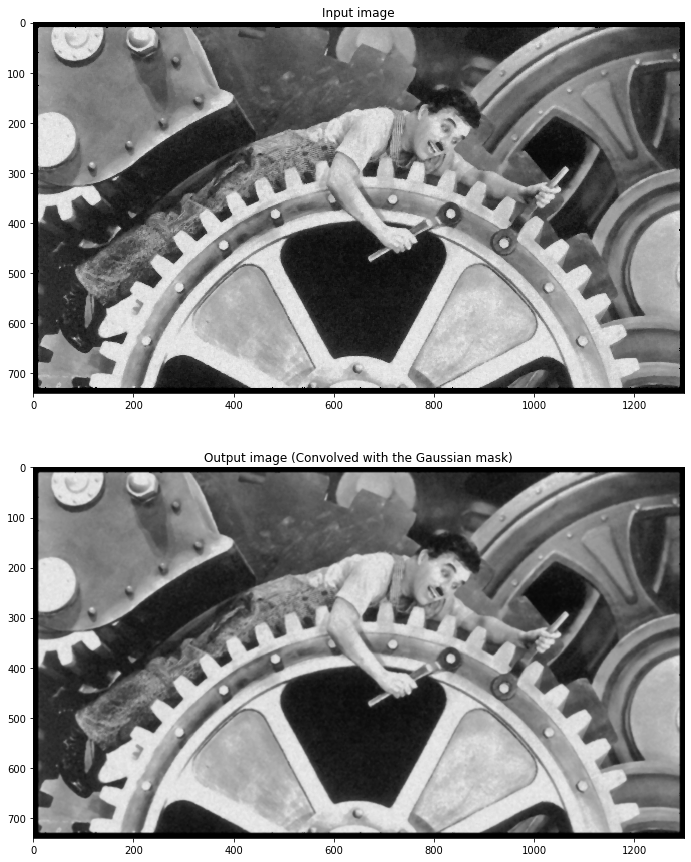

In [6]:
mask = np.asarray([[1,2,1,2,1],[2,4,8,4,2],[1,8,18,8,1],[2,4,8,4,2],[1,2,1,2,1]])/90 # Gaussian mask
img_med_conv=conv2d(image_med, mask)# Getting the convolved image

## plot
fig, (ax, ax1) = plt.subplots(2,1)
ax.imshow(image_med, vmin=0, vmax=255)
ax.set_title("Input image")
ax1.imshow(img_med_conv, vmin=0, vmax=255)
ax1.set_title("Output image (Convolved with the Gaussian mask)")


<font color='blue'>
    The convolution with the given kernel performs as a low-pass filter and the image gets smoother since the Kernel is the Gaussian filter. The image becomes a bit blur after passing through the Gaussian filter.

### Question 4 (1 point)
We will now fix the effect of the previous gaussian filter by implementing an edge-enhancement filter. To do so, we will use the  Laplacian of the image:
$\Delta(I)$. 
Implement your filter following the two following steps:
1. A low band filter gaussian filter is applied: $I_g = G * I$
2. $I_r = I_g + k\times \Delta(I_g)$ 
where $k$ is a constant you'll tune to obtain the best result.
As a reminder, the Laplacian can be easily obtained using a convolution with the following mask :
```python
mask_laplacian = np.asarray([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])
```
For the Gaussian filter, use the mask:
```python
mask_gaussian = np.asarray([[1,2,1], [2,4,2], [1,2,1]])
```


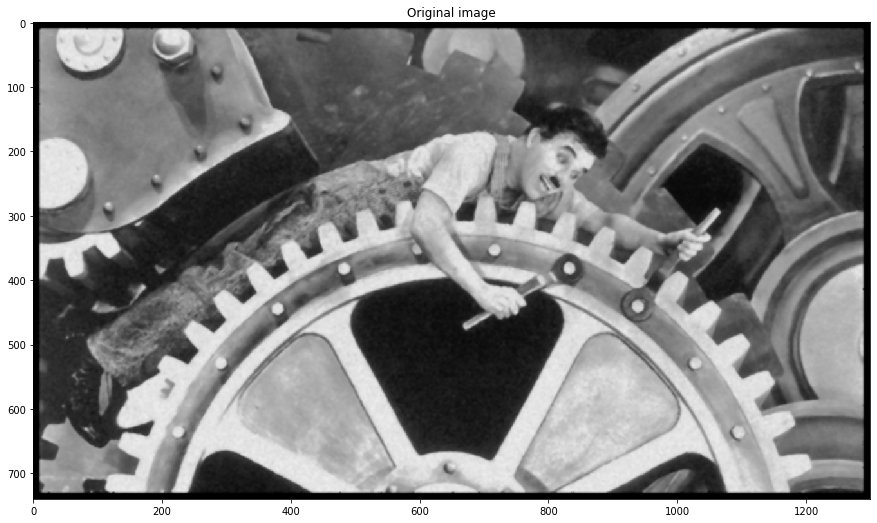

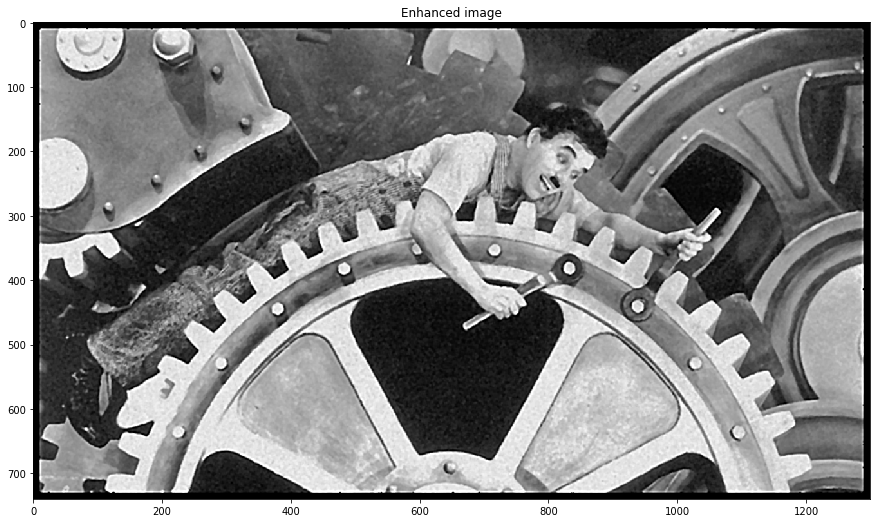

In [7]:
## masks definition
mask_laplacian = np.asarray([[-1.,-1.,-1.], [-1.,8.,-1.], [-1.,-1.,-1.]])
mask_gaussian = np.asarray([[1.,2.,1.], [2.,4.,2.], [1.,2.,1.]])/16
I_g = conv2d(img_med_conv, mask_gaussian)
Delta_I_g=conv2d(I_g, mask_laplacian)
plt.imshow(img_med_conv, vmin=0, vmax=255)
plt.title("Original image")
plt.show()

k = 1.5 # Among different values of K, k = 1.5 is selected as the optimal value
I_r = I_g + k * Delta_I_g
plt.figure()
plt.imshow(I_r, vmin=0, vmax=255)
plt.title("Enhanced image")
plt.show()

<font color='blue'>
Laplacian filter is a high-pass filter that can detect the edges of the image. By combining the Laplacian filter with the gaussian filtered image (as given for $I_r$), the edges of the images are enhanced. By increasing the K value, the image edges are higlighted more. However, a very big K value destroys the smooth areas of the images. K = 1.5 is visually selected as the optimal value. 

## Exercice 2 - Coin counter

You are now in charge of coding a coin counter. Since Canadian coins are mostly round, it's the perfect opportunity for you to test your knowledge in morphological filtering.

**Note**: There is an excellent [tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) on morphological operators with *opencv-cv* that we highly recommend you to read.

### Question 1 (0,5 point)
Load the file **pieces.jpg** in grayscale. Display the image.


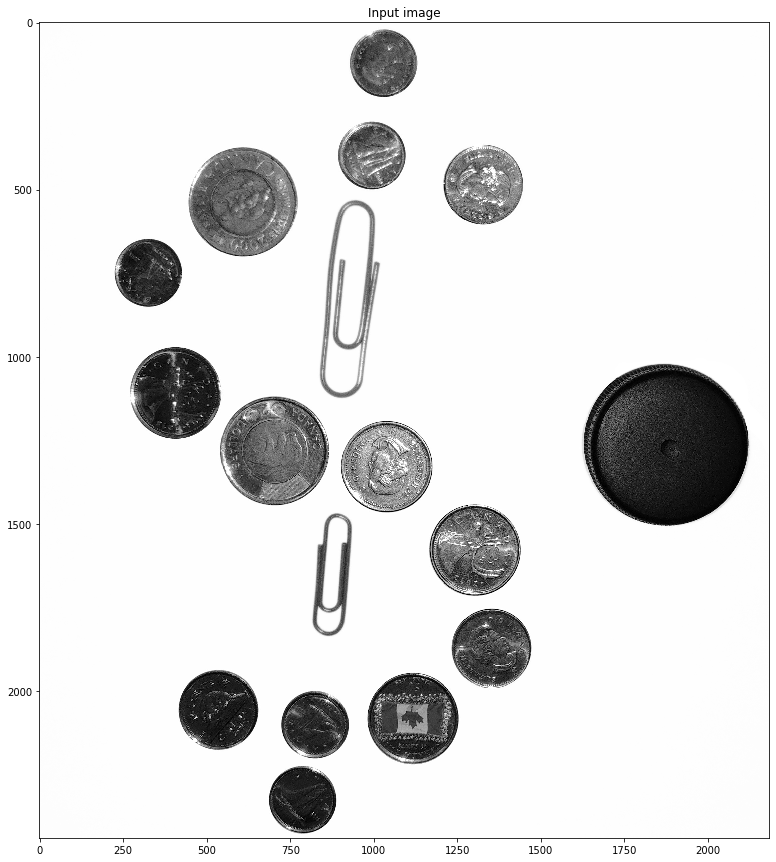

In [8]:
img = cv2.imread('pieces.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, vmin=0, vmax=255)
plt.title("Input image")
plt.show()

### Question 2 (0,5 point)
Implement the function
```python
def binarize(img, threshold):
    ...
```
that sets to 0 all pixels below a given threshold and to 255 all the others. This function takes an image and a threshold as parameters and outputs the thresholded image. Binarize your image with a threshold at 250. Of course, since we want to count the coins, they'll have to appear in white and you will have to invert the colors of your resulting binary image. Display it.


In [9]:
def binarize(img, threshold):
    """
    param img: image as np.uint8 
    param threshold: binarization threshold
    """
    img_binary = np.uint8(255*(img>threshold))
    return img_binary
    

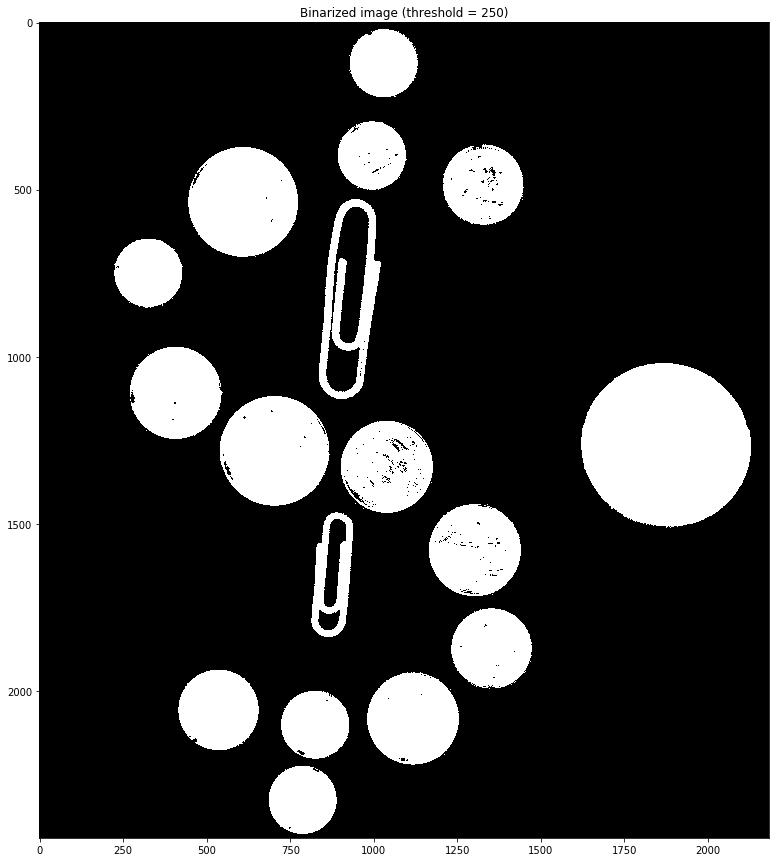

In [10]:
threshold = 250
img_b = 255- binarize(img,threshold)# Binarization and getting the negative image
plt.imshow(img_b, vmin=0, vmax=255)
plt.title("Binarized image (threshold = {})".format(threshold))
plt.show()

### Question 3 (1 point)
With the given threshold, small holes appears in your coins. Do a morphological closing in order to remove them, without modifying much the size of the coins. You will have to choose the approximate structuring element. Display the result.

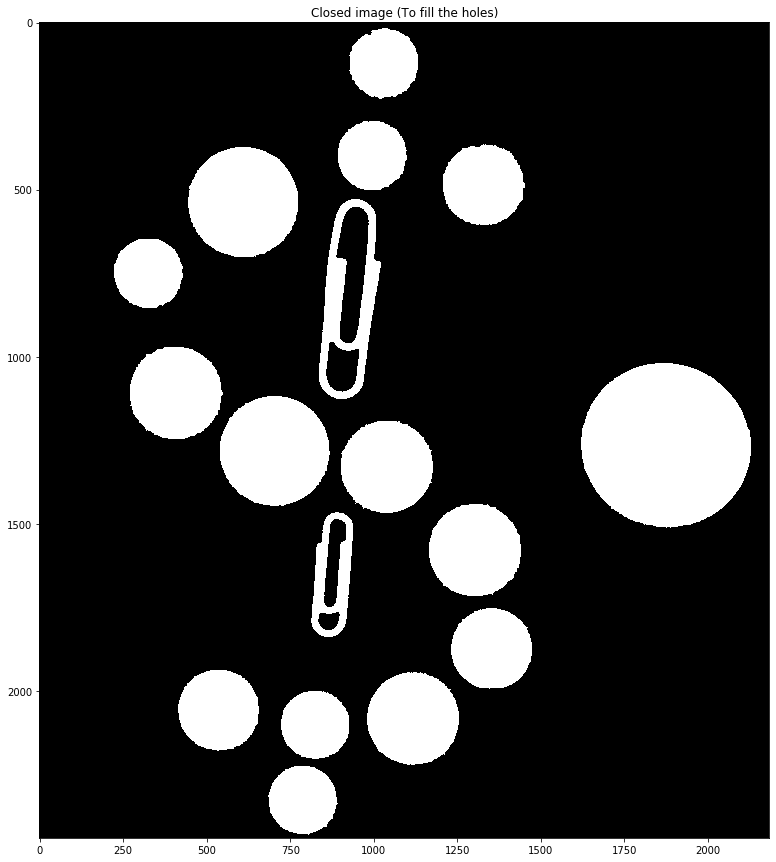

In [11]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(15,15))# Kernel size should be more than the biggest hole in the object
img_close = cv2.morphologyEx(img_b, cv2.MORPH_CLOSE, kernel) #Closing
## Plot
plt.imshow(img_close, vmin=0, vmax=255);
plt.title("Closed image (To fill the holes)")
plt.show()

### Question 4 (3 points)
Implement the function:
```python
def count_coins(img_bin):
    ...
```
 which counts the total number of coins using erosion or dilation. The output of the function should be their sum in dollars.
 Here are some disk radius that might serve you : 200, 140, 120, 110, 90 (there are no coins of 1 dollar, 50 cents and 1 cent in the image). 

To count the number of connected components in an image, you can use the following function:
```python
def nb_components(img_bin):
    num_labels, labels_im = cv2.connectedComponents(img_bin)
    return num_labels-1 # We remove 1 because the background is considered as one connected component
```

In [12]:
def nb_components(img_bin):
    num_labels, labels_im = cv2.connectedComponents(img_bin)
    return num_labels-1

In [13]:
coin_val = np.asarray([0, 10, 5, 25, 200]) # The values of coins sorted by the size (CENT)
stct_radius = np.asarray([90,110,120,140,200]) # kernel radius to detect the coins
stct_diameter= 2 * stct_radius # Getting the diameters
list_nb_coins= [] # Holder for number of different coins 
totall_coins=nb_components(img_close) # Total number of objects 
print('Number of coins:')
for ind, i in enumerate(stct_diameter):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(i,i)) # circle structuring element with specific diameters
    img_erode = cv2.morphologyEx(img_close, cv2.MORPH_ERODE, kernel) # Image erosion
    nb_coins = nb_components(img_erode) # Counting the existing objects
    dis_coins = totall_coins-nb_coins # Counting disappeared objects in this step
    list_nb_coins.append(dis_coins) 
    totall_coins = nb_coins 
    c = coin_val[ind]%100 # The value of the coin set in Cent unit
    d = coin_val[ind]//100 # The value of coin set in Dollor
    print('Coin values: {} ($).{} (¢) --> Number of coins: {}'.format(d,c,dis_coins))
    
total_value = (list_nb_coins*coin_val).sum() # Total value of the coins
c_total = total_value%100
d_total = total_value//100
print('\nSummation:  {}($).{}(¢) '.format(d_total,c_total))

Number of coins:
Coin values: 0 ($).0 (¢) --> Number of coins: 2
Coin values: 0 ($).10 (¢) --> Number of coins: 5
Coin values: 0 ($).5 (¢) --> Number of coins: 3
Coin values: 0 ($).25 (¢) --> Number of coins: 4
Coin values: 2 ($).0 (¢) --> Number of coins: 2

Summation:  5($).65(¢) 


<font color='blue'>
There is 5.65 $ coins in the input picture

# Séance 2: Fourier Transform and Spectral Filtering
## Exercise 3 2D FFT
The goal of this exercise is to familiarize yourself with the 2D-Fourier transform and some of its properties.

We are going to study the function:
$f(x, y) = \sin(\frac{2\pi}{256}[f_1 x+f_2 y] ) \text{  with  } x, y \in [0, 256]$

### Question 1 (1 point)
Create the function:
```python
def f(f1, f2):
    ...
```
that takes $\{f_1, f_2\}$ as parameters and outputs a monochromatic image of size 256x256. We highly suggest you to reead the documention of the function [np.meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) for an efficient implementation (without *for* loop).

<font color='blue'>
We consider $x, y \in [0, 255]$ instead of $x, y \in [0, 256]$ to have images with the size $256 \times 256$.

In [14]:
def f(f_i):
    f1 = f_i[0]
    f2 = f_i[1]
    # To get the image of size 256*256, x and y are in the range of 0 ..255
    x = np.arange(0,256)
    y = np.arange(0,256)
    xv, yv = np.meshgrid(x, y)
    f = np.sin(2*np.pi/256*(f1*xv+f2*yv))
    return f

### Question 2 (1,5 points)
For each of the following couple of parameters, display on adjancent axes the image $f(x, y)$ and its spectre (amplitude of the Fourier Transform). 

$\{f_1, f_2\}=$
1. \{12, 0\}
2. \{0, 12\}
2. \{12, 12\}
1. \{12, 32\}
1. \{32, -32\}

You'll have to do the computation of the spectre within a function:
```python
def fft_spectre(img):
    ...
```
that takes an image as a parameter and outputs the normalized spectre such that its maximal value is 1 and its minimal value is 0. Use the functions [np.fft.fft2](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html#numpy.fft.fft2) and [np.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html#numpy.fft.fftshift).
For the normalization, you can use the following relation:
$f_{normalisée} = \frac{f-\min(f)}{\max(f)-\min(f)}$
**Note:** Do not forget to add a title to all your figures to make them easily identifiable!

In [15]:
def fft_spectre(img):
    """
    param img: image as np.uint8 
    """
    img_fft = np.fft.fft2(img)
    img_fft = abs(np.fft.fftshift(img_fft))
    fft_normalize = (img_fft-img_fft.min())/(img_fft.max()-img_fft.min())
    return fft_normalize
    

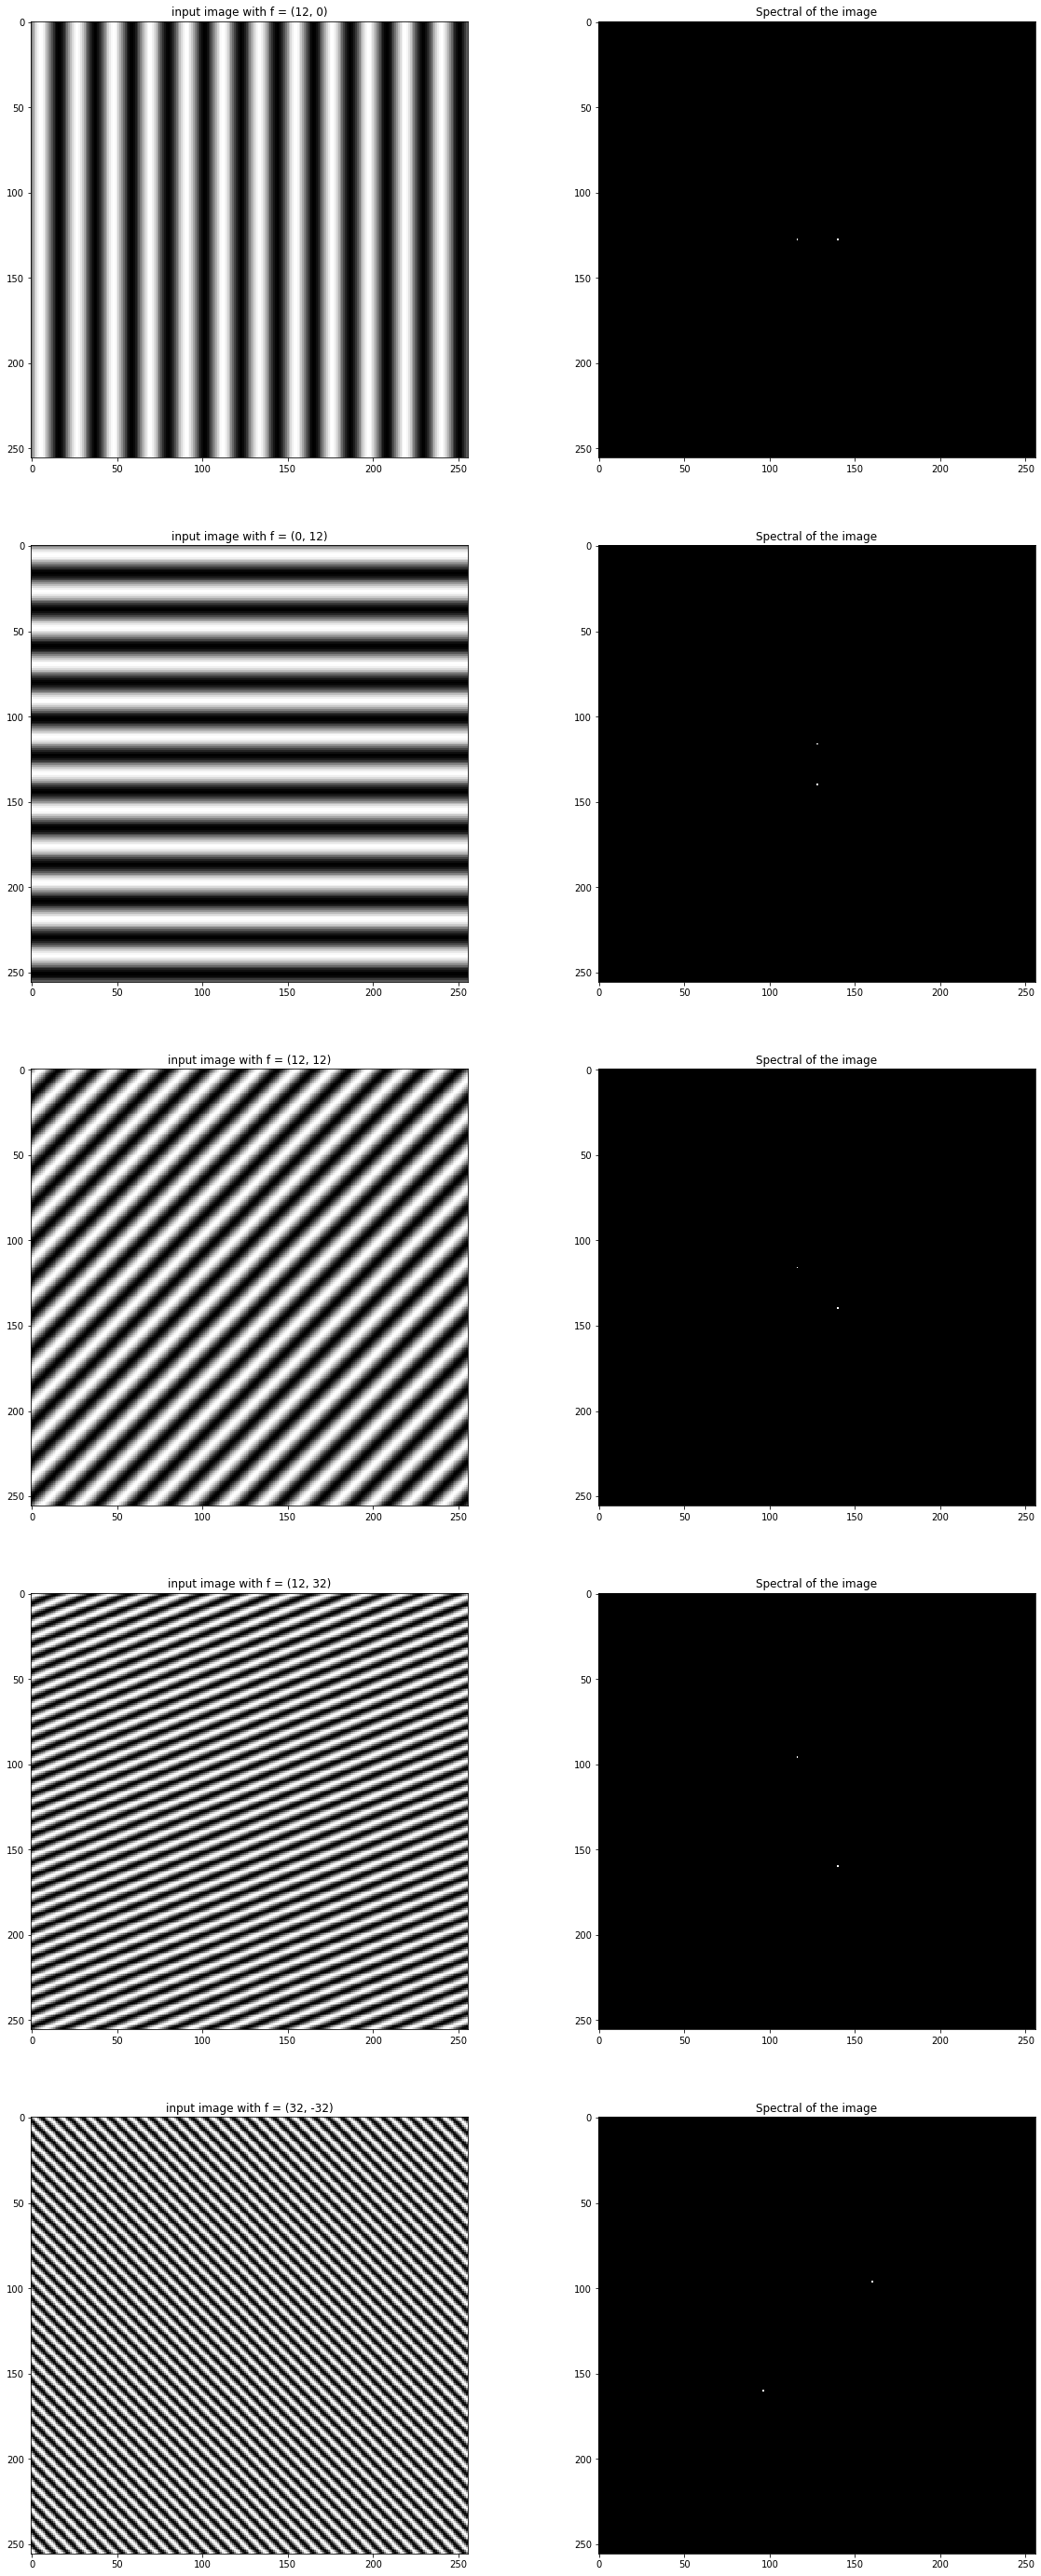

In [16]:
fig, ((ax, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7), (ax8, ax9)) = plt.subplots(5,2, figsize=(20, 50))

f_vals = (12,0)# Specifying (f1,f2)
img = f(f_vals)# Get the image
fft_img = fft_spectre(img) # Getting Normalized fft
ax.imshow(img)
ax.set_title("input image with f = {}".format(f_vals))
ax1.imshow(fft_img)
ax1.set_title("Spectral of the image")


f_vals = (0,12)
img = f(f_vals)
fft_img = fft_spectre(img)
ax2.imshow(img)
ax2.set_title("input image with f = {}".format(f_vals))
ax3.imshow(fft_img)
ax3.set_title("Spectral of the image")

f_vals = (12,12)
img = f(f_vals)
fft_img = fft_spectre(img)
ax4.imshow(img)
ax4.set_title("input image with f = {}".format(f_vals))
ax5.imshow(fft_img)
ax5.set_title("Spectral of the image")

f_vals = (12,32)
img = f(f_vals)
fft_img = fft_spectre(img)
ax6.imshow(img)
ax6.set_title("input image with f = {}".format(f_vals))
ax7.imshow(fft_img)
ax7.set_title("Spectral of the image")

f_vals = (32,-32)
img = f(f_vals)
fft_img = fft_spectre(img)
ax8.imshow(img)
ax8.set_title("input image with f = {}".format(f_vals))
ax9.imshow(fft_img)
ax9.set_title("Spectral of the image")
plt.show()


### Question 3 (1 point)
Complete the following sentences, using your observations from previous questions about the properties of the Fourier Transform.

In [17]:
prop = "The homothetic transformation (upscaling or downscaling) of an image along a given axis \
leads to %s of its spectre in Fourier domain."
ans = "reverse transformation (downscaling or upscaling) in the axis"# - decrease or increase the frequency distances 
print(prop%ans)


prop = "Rotation by an angle alpha of an image \
leads to %s of its spectre in Fourier domain."
ans = " rotation with the same alpha angle"
print(prop%ans)

The homothetic transformation (upscaling or downscaling) of an image along a given axis leads to reverse transformation (downscaling or upscaling) in the axis of its spectre in Fourier domain.
Rotation by an angle alpha of an image leads to  rotation with the same alpha angle of its spectre in Fourier domain.


### Question 4 (1 point)
Given the mathematical function:

$f(x, y)=\sin(\frac{2\pi}{256}f_1r)$ où $r=\sqrt{x^2+y^2} \text{  avec  } x, y \in [-128, 128]$

Write the python fonction:
```python
def wave(f1):
    ...
```
that takes $f_1$ as a parameter and outputs an image of size 256x256.

As previsously, display on the same figure the pairs images/spectres for the following values of $f_1$:
$f_1=\{12,64,128,256\}$
What do you observe?

<font color='blue'>
We consider $x, y \in [-128, 127]$ instead of $x, y \in [-128, 128]$ to have images with the size $256 \times 256$.

In [18]:
def wave(f1):
    # To get the image of size 256*256, x and y are in the range of -128 .. 127
    x = np.arange(-128,128)
    y = np.arange(-128,128)
    xv, yv = np.meshgrid(x, y)
    f = np.sin(2*np.pi/256*f1*np.sqrt(xv**2+yv**2))
    return f

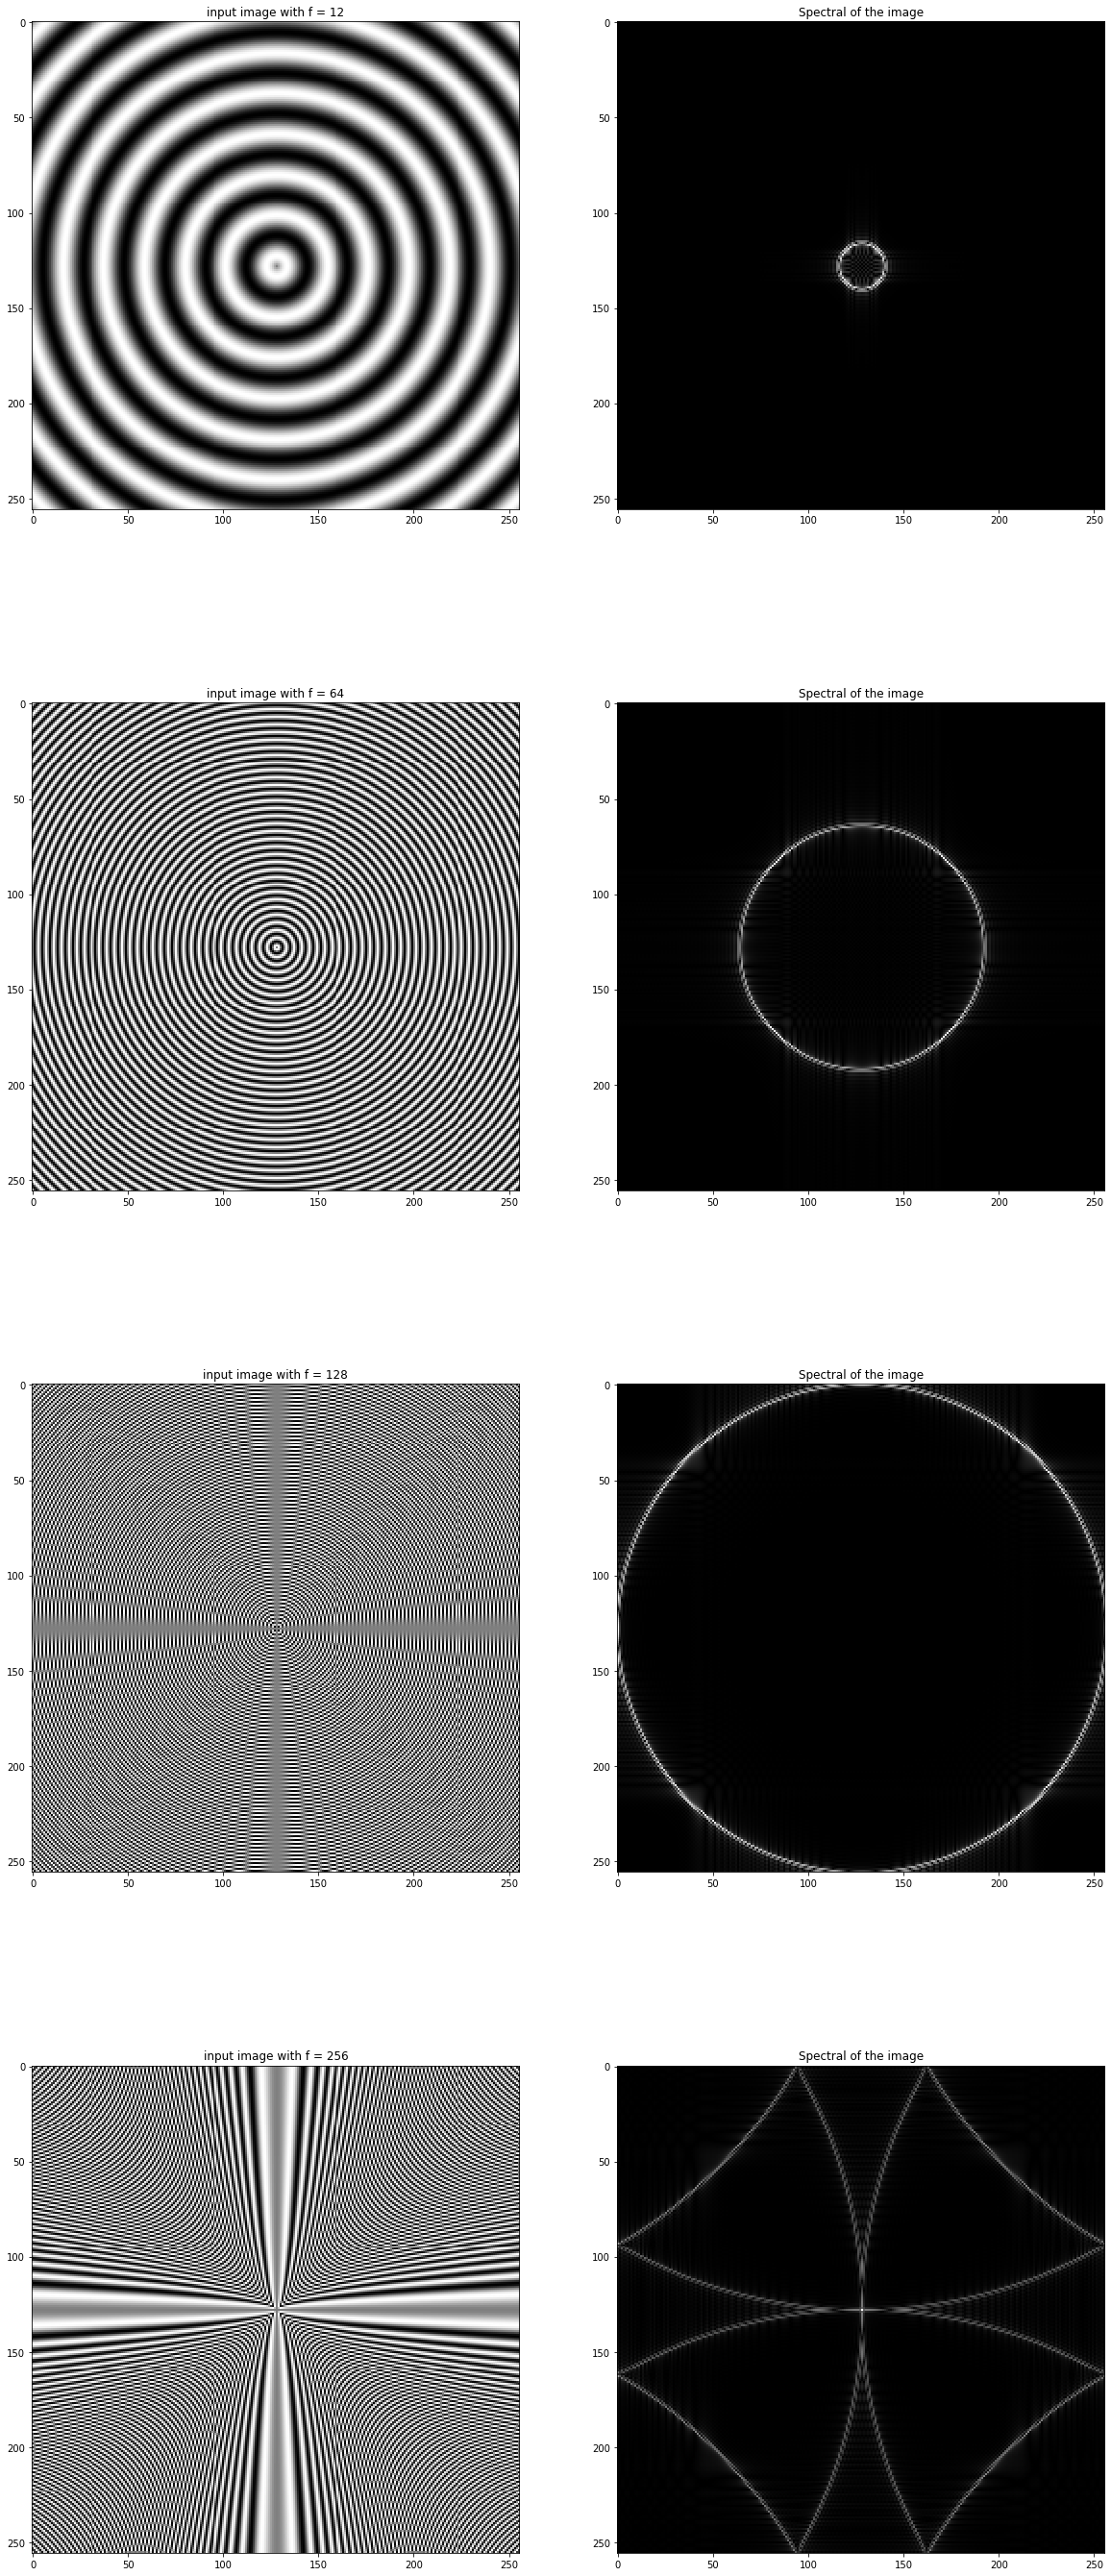

In [19]:
fig, ((ax, ax1), (ax2, ax3), (ax4, ax5), (ax6, ax7)) = plt.subplots(4,2, figsize=(20, 50))

f_val = 12 # F value
img = wave(f_val) # Getting the image
fft_img = fft_spectre(img) # Getting the Normalized fft
ax.imshow(img)
ax1.imshow(fft_img)
ax.set_title('input image with f = {}'.format(f_val));
ax1.set_title("Spectral of the image")

f_val = 64
img = wave(f_val)
fft_img = fft_spectre(img)
ax2.imshow(img)
ax3.imshow(fft_img)
ax2.set_title('input image with f = {}'.format(f_val));
ax3.set_title("Spectral of the image")

f_val = 128
img = wave(f_val)
fft_img = fft_spectre(img)
ax4.imshow(img)
ax5.imshow(fft_img)
ax4.set_title('input image with f = {}'.format(f_val));
ax5.set_title("Spectral of the image")

f_val = 256
img = wave(f_val)
fft_img = fft_spectre(img)
ax6.imshow(img)
ax7.imshow(fft_img)
ax6.set_title('input image with f = {}'.format(f_val));
ax7.set_title("Spectral of the image")
plt.show()



<font color='blue'>
By increasing the frequency of the synthesized images, their fourier transforms show higher spectral contents. According to Shannon condition, the frequencies above $f = 128$ cause aliasing as can be seen in the last image ($f = 256$)

## Exercise 4  Spectral and homomorphic filtering

### Question 1 (1 point)
A mysterious file is provided, representing a famous portrait. Unfortunately, its identification is impossible because of a double parasite signal (sinusoidal), at the frequencies of $\pm 50$ along the each direction ($\pm x, \pm y$).



Load the file named **imageMystere.png**, displayed it as well as its Fourier Transform..

**Note:** Until now, we have only studied artificial images with a voluntarily spare spectral content. The spectre of the  mysterious image is way more dense, consequently its visualization is slightly more complicated (the many frequencies in the spectres have relatively small magnitude). To better distinguish what is going on, display the spectre in decibel:
```python
epsilon = 1e-7 # To avoid a log(0) error.
plt.imshow(20*np.log10(spectre+epsilon))
plt.show()
```
After a call to the fftshift function, the center of the spectre corresponds to the frequency (0,0). Verify you can see the signature of the parasites signals in the spectre.

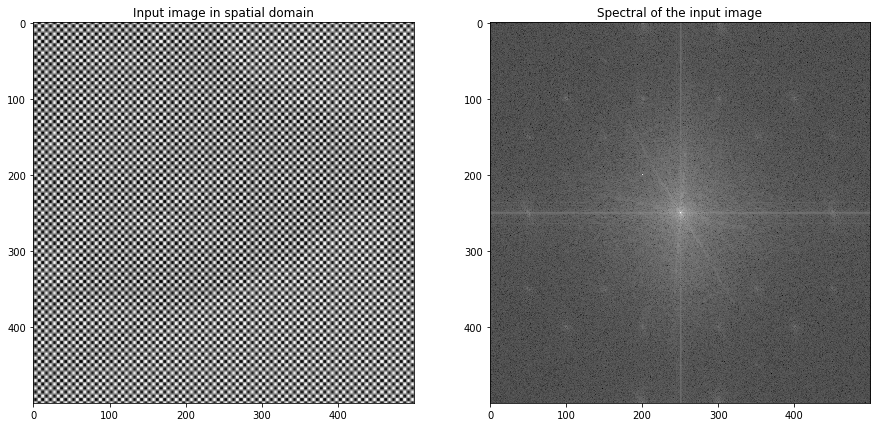

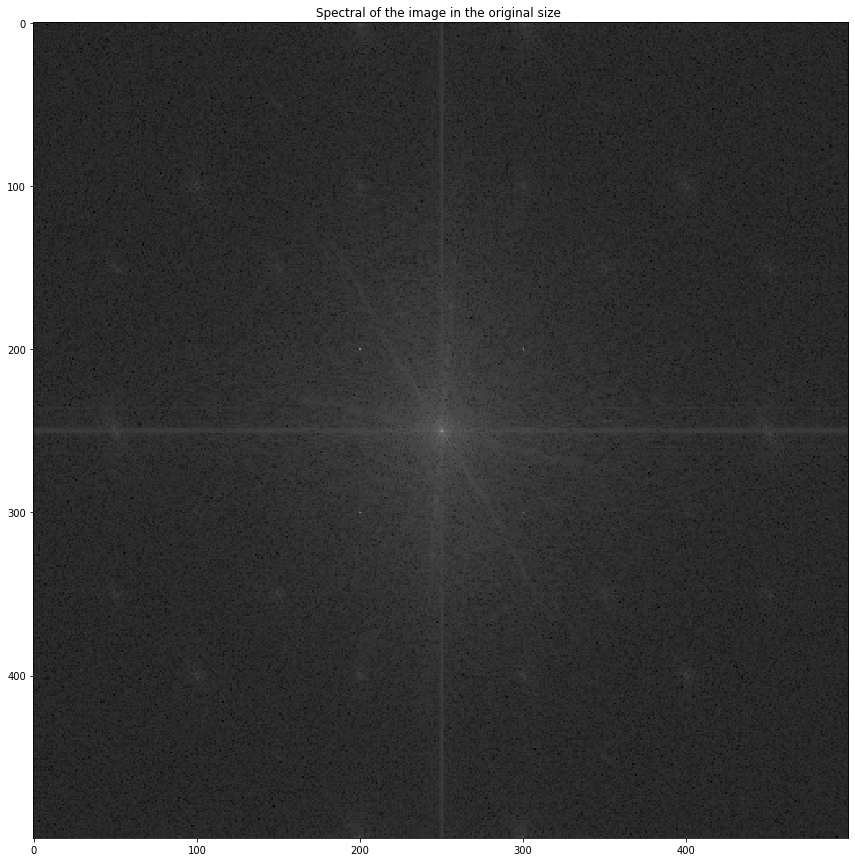

In [20]:
img = cv2.imread('imageMystere.png', cv2.IMREAD_GRAYSCALE)
fft_img = np.fft.fft2(img) # Getting FFT of the image
spect_img_shift = abs(np.fft.fftshift(fft_img)) # Spectral of the shifted FFT


fig1, (ax, ax1) = plt.subplots(1,2)
ax.imshow(img, vmin=0, vmax=255)
ax.set_title('Input image in spatial domain')
epsilon = 1e-7 # To avoid a log(0) error.
ax1.imshow(20*np.log10(spect_img_shift+epsilon))
ax1.set_title('Spectral of the input image')

## For better visualization
plt.figure()
epsilon = 1e-7 # To avoid a log(0) error.
plt.imshow(20*np.log10(spect_img_shift+epsilon), vmin = 0, vmax = 255)
plt.title('Spectral of the image in the original size ');


<font color='blue'>
The signature of the parasite is visible (better visualized in the last image) as four highlighted points around the center of the image at the frequencies of $\pm 50$.

### Question 2 (2 points)

We are going to eliminate the perturbations directly from the Fourier domain, by creating a filter that will be applied (through multiplication) to the fft.
The filter will have to be conceived according to one (or multiple) Gaussian profiles, following the formula:

$H(u, v) = 1-e^{-((u \pm f)^2+(v \pm f)^2)/\sigma }$ where $\sigma$ will allow to tune the selectivity of the filter and $f$ is a frequency to filter.


Adapt this formula in order to create a mask that will allow to get rid of the perturbations.
Display it on a figure. We will chose $\sigma=5$. What type of filter (low-band, high-band, ...) do you recognize? Visually, what does the parameter $\sigma$ ?

In [21]:
sigma = 5
x_size = fft_img.shape[0]
y_size = fft_img.shape[1]
x = np.arange(0,x_size)
y = np.arange(0,y_size)
u, v = np.meshgrid(x, y)

## Gaussian profiles
f = 50
G1 = np.exp(-(((u-f)**2)+(v-f)**2)/sigma)
G2 = np.exp(-(((u-(x_size-f))**2)+(v-f)**2)/sigma)
G3 = np.exp(-(((u-(x_size-f))**2)+(v-(y_size-f))**2)/sigma)
G4 = np.exp(-(((u-f)**2)+(v-(y_size-f))**2)/sigma)


H = 1- (G1+G2+G3+G4)
H_shift = np.fft.fftshift(H)

filtered_fft = H*fft_img # Filtering in frequency domain


<font color='blue'>
The $\sigma$ value changes the standard deviation of the gaussian profile. The created filter H acts as the band-stop filter and by selecting the small values of $\sigma$, it can be a notch filter. We use them for eliminating the single frequency occured at $\pm50$
    
By increasing the values of $\sigma$, the affected areas at the perfoming points are increased. The fourier of the image would have black areas and the filter would have perform as the band-stop filter with higher band-width.

### Question 3 (1 point)

Use your mask to filter the Fourier Transform (**not just the magnitude!**) and reconstruct the image using the inverse Fourier Transform [np.fft.ifft2](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.fft.ifft2.html).
Display the reconstructed image and its spectre.

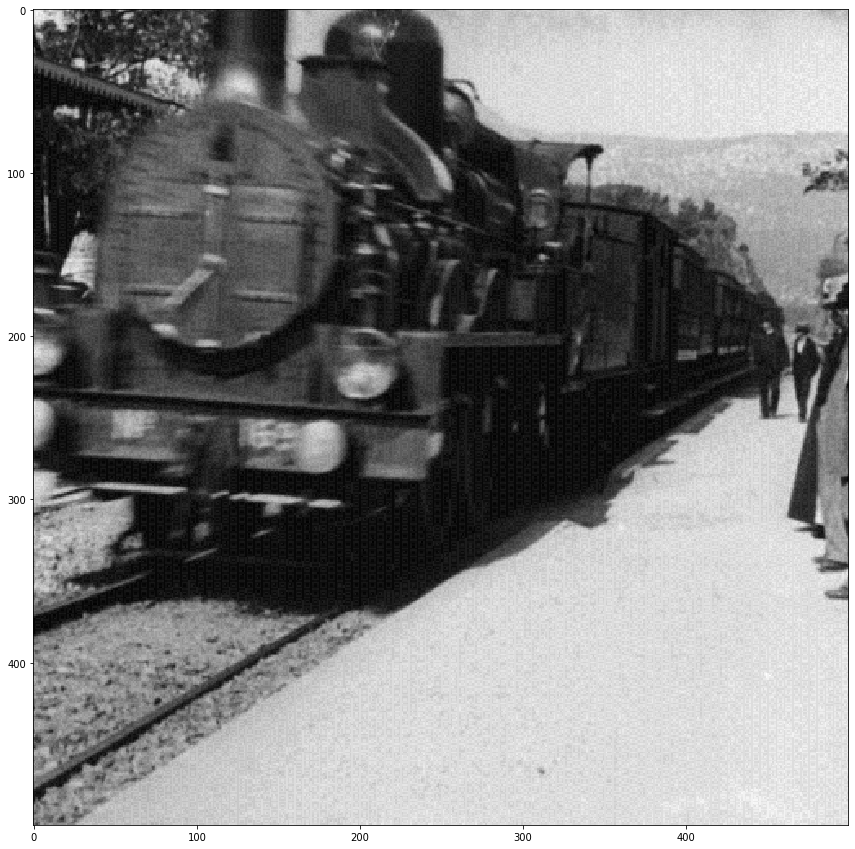

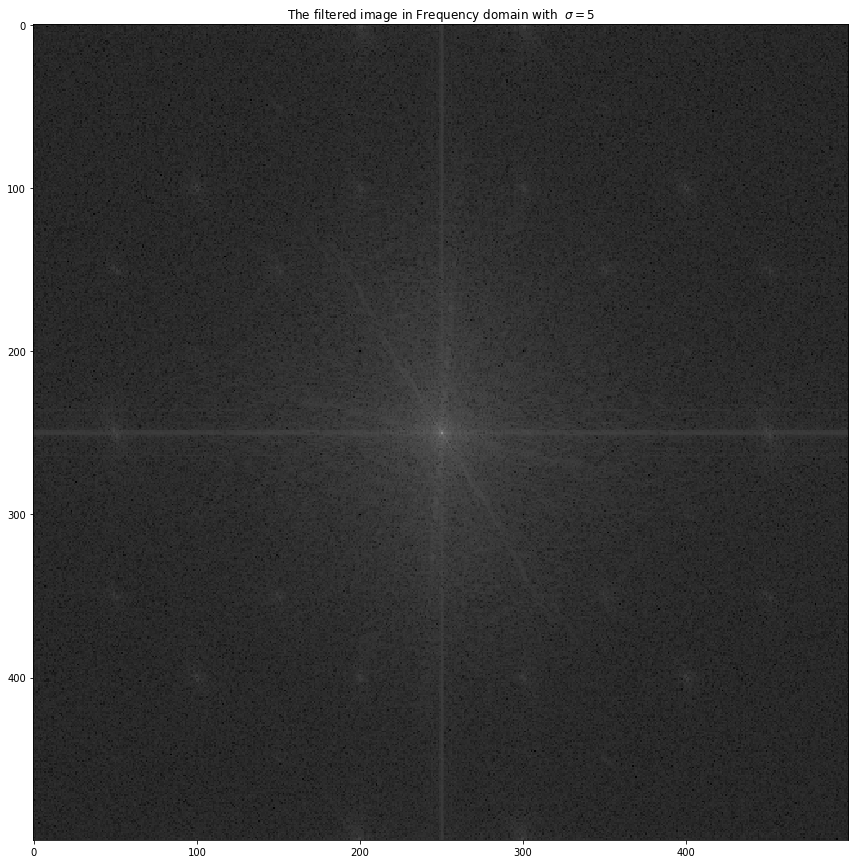

In [22]:
filtered_img =  np.fft.ifft2(filtered_fft)
plt.imshow(abs(filtered_img))
plt.show()

fft_filtered_img = np.fft.fft2(filtered_img)

plt.imshow(20*np.log10(abs(np.fft.fftshift(fft_filtered_img))+epsilon), vmin = 0, vmax = 255)
plt.title("The filtered image in Frequency domain with  $\sigma= {}$".format(kernel_size))
plt.show()

### Question 4 (1,5 points)
We recall that the definition of a homomorphic filter is $H(u, v)=(\gamma_H-\gamma_L)[1-e^{-c\frac{D^2(u, v)}{D^2_0}}]+\gamma_L$ where $D(u, v)=u^2+v^2$

Implement this filter and test it with the following parameters:
$D_0=2, \gamma_H=2, \gamma_L=0.5, c=1$.

Don't forget that the homomorphic filter is applied on the Fourier Transform of **logarithmic** image. Thus, once the filter is applied and back to the spatial domain, don't forget to take the **exponential** of the result.



Display the result (mask and filtered image) and describe the effect of the parameters $\gamma_H, \gamma_L$ and $D_0$.

In [23]:
def homomorphic(u , v , img_size = (500,500) , gamma_l = 0.5, gamma_h = 2 , D_0 = 2 , c = 1):
    H = (gamma_h-gamma_l) * (1-np.exp(-c*((u-img_size[0]/2)**2+(v-img_size[1]/2)**2)/D_0**2)) + gamma_l #Shifted fft is computed
    return np.fft.fftshift(H) # Back to "without shift"

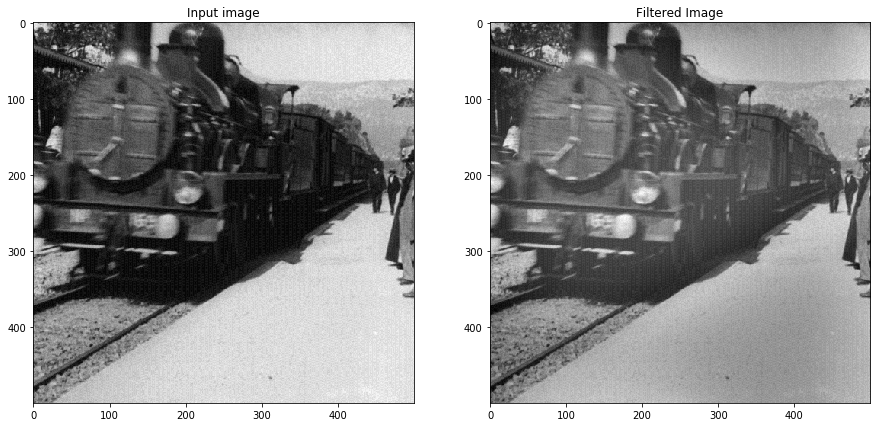

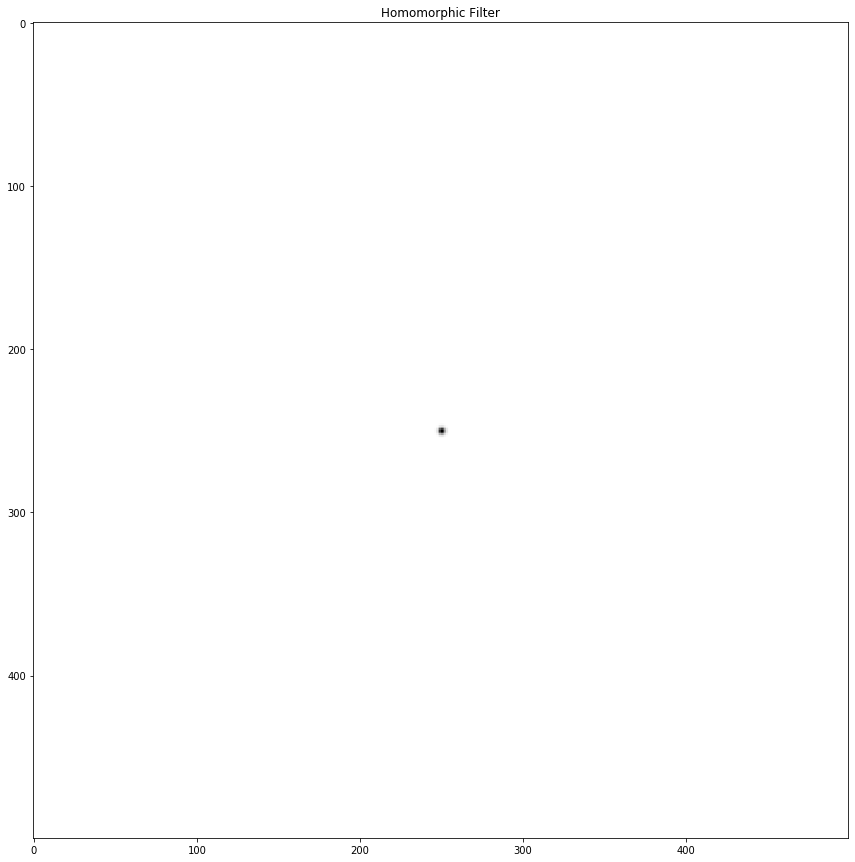

In [24]:
x = np.arange(0,x_size)
y = np.arange(0,y_size)
u, v = np.meshgrid(x, y)
fig1, (ax, ax1) = plt.subplots(1,2)
ax.imshow(abs(filtered_img))
ax.set_title("Input image")

## Getting the homomorphic filter and plotting
homofilter = homomorphic(u , v , img_size =(x_size, y_size), gamma_l = 0.5 , gamma_h = 2, D_0 = 2)
homofilter_shift = np.fft.fftshift(homofilter)
plt.figure()
plt.imshow(abs(homofilter_shift))
plt.title("Homomorphic Filter")

img = filtered_img
img_log = np.log(img)
img_fft = np.fft.fft2(img_log)
filt_spectral = img_fft * homofilter


filt_img_log = np.fft.ifft2(filt_spectral)
filt_img = np.exp(filt_img_log)
ax1.imshow(abs(filt_img))
ax1.set_title("Filtered Image")
plt.show()

<font color = 'blue'>
If the image is considered as the multiplication of illumination and reflection, the values of $\gamma_H$ and $\gamma_L$  correspond to the contribution made by reflectance and illumination respectively. The illumination engages most of low-frequency and in contrast, the reflection made most of high frequencies. The given values for the high frequency gain ($\gamma_H$ = 2) and the low frequency gain ($\gamma_L$ = 0.5) shows that the filter doubles the effect of the energy of reflection while reduces the energy of illumination by dividing in 2. 

The value of $D_0$ changes the standard deviation of the gaussian function and so performs as a cut-off frequency. Changing its value will change the illumination-reflectance setup.